<a href="https://colab.research.google.com/github/Taiba528/My-Python-World/blob/master/Word_Frequency/Speech_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Here I am going to analyse the President speech on Independence day followed by MK Gandhi's Quit India speech.I am going to compare the results using three different tools (word frequency,line graph and word cloud).

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
#Importing necessary libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import operator
import re
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
import os



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Access the file for analysis


### I have saved these two speeches in txt format in my system and uploading it in google colab for analysis.

In [2]:
from google.colab import files
uploaded=files.upload()


Saving independence day speech.txt to independence day speech.txt


In [0]:
with open(os.getcwd()+ "/independence day speech.txt", encoding='cp1252') as fh: 
    filedata = fh.read()

In [0]:
#magic commands to see multiple output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
#Print first 500 characters in the file
print("Data read from file : ", filedata[0:500] )

Data read from file :  My dear countrymen, I convey my best wishes to all of you on this auspicious occasion of Independence Day. Today, the country is brimming with self-confidence. The country is scaling new heights by working extremely hard, with a resolve to realize its dreams. Today’s dawn has brought a new spirit, a new enthusiasm, a new zeal and a new energy with it.

My dear countrymen, in our country, there is a Neelakurinji flower which blooms once every 12 years. This year, Neelakurinji is in full bloom on 


In [6]:
import nltk
nltk.download('punkt')
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
corpus=PlaintextCorpusReader(os.getcwd(),"independence day speech.txt",encoding='cp1252')
print(corpus)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<PlaintextCorpusReader in '/content'>


In [7]:
print("Files in this corpus : ", corpus.fileids())

Files in this corpus :  ['independence day speech.txt']


In [8]:
paragraphs=corpus.paras()
print("\n Total paragraphs in this corpus : ", len(paragraphs))


 Total paragraphs in this corpus :  128


In [9]:
sentences=corpus.sents()
print("\n Total sentences in this corpus : ", len(sentences))


 Total sentences in this corpus :  627


## Tokenization


### The first step in text analytics after reading the file is tokenization .It can be done at sentence level,word level or even character level.Here I am tokenizing it at word level.

In [11]:
tokens = nltk.word_tokenize(filedata)
print("Tokens : ",tokens[:20])
print("\n Total Tokens : ",len(tokens))

Tokens :  ['My', 'dear', 'countrymen', ',', 'I', 'convey', 'my', 'best', 'wishes', 'to', 'all', 'of', 'you', 'on', 'this', 'auspicious', 'occasion', 'of', 'Independence', 'Day']

 Total Tokens :  9637


### So the total token is 9637(words including punctuation).Let's check the frequency distribution of these tokens.

<FreqDist with 2058 samples and 9637 outcomes>
[('?', 560), ('the', 492), (',', 440), ('.', 429), ('of', 279), ('to', 247), ('and', 221), ('in', 158), ('a', 134), ('is', 133), ('have', 100), ('are', 87), ('our', 85), ('we', 80), ('that', 78), ('country', 74), ('for', 72), ('with', 59), ('has', 56), ('this', 55), ('I', 54), ('will', 48), ('it', 47), ('on', 43), ('from', 42)]


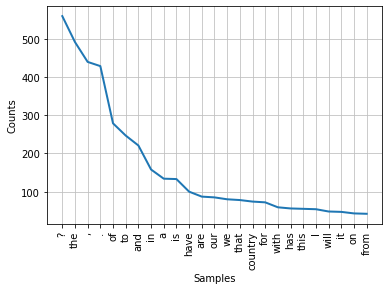

In [12]:
import nltk
import operator
%matplotlib inline
Freq_dist_nltk=nltk.FreqDist(tokens)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

### We can see, so many punctuation and stop words are there,for text analytics we neeed to remove all these.in the following steps we will do it.

## Cleaning of file

### Remove Punctuation

In [14]:
#Use the Punkt library to extract tokens
tokens_1 = list(filter(lambda token: nltk.tokenize.punkt.PunktToken(token).is_non_punct, tokens))
print("Tokens after removing punctuation : ",tokens_1[:20])
print("\nTotal tokens after removing punctuation : ", len(tokens_1))

Tokens after removing punctuation :  ['My', 'dear', 'countrymen', 'I', 'convey', 'my', 'best', 'wishes', 'to', 'all', 'of', 'you', 'on', 'this', 'auspicious', 'occasion', 'of', 'Independence', 'Day', 'Today']

Total tokens after removing punctuation :  8074


### After removing punctuation,we get 8074 words,now we need to remove stopwords.

## Normalization

In [17]:
tokens_2=[word.lower() for word in tokens_1 ]
print("Tokens list after converting to lower case : ", tokens_2[:20])
print("\nTotal tokens after converting to lower case : ", len(tokens_2))

Tokens list after converting to lower case :  ['my', 'dear', 'countrymen', 'i', 'convey', 'my', 'best', 'wishes', 'to', 'all', 'of', 'you', 'on', 'this', 'auspicious', 'occasion', 'of', 'independence', 'day', 'today']

Total tokens after converting to lower case :  8074


### Here we have converted the upper case letter into lower case,so that  words can not be counted twice just because of case difference.

# Removing Stopwords

In [18]:
#Download the standard stopword list
nltk.download('stopwords')
from nltk.corpus import stopwords

#Remove stopwords
tokens_3 = list(filter(lambda token: token not in stopwords.words('english'), tokens_2))
print("Tokens list after removing stop words : ", tokens_3[:20])
print("\nTotal tokens after removing stop words : ", len(tokens_3))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Tokens list after removing stop words :  ['dear', 'countrymen', 'convey', 'best', 'wishes', 'auspicious', 'occasion', 'independence', 'day', 'today', 'country', 'brimming', 'self-confidence', 'country', 'scaling', 'new', 'heights', 'working', 'extremely', 'hard']

Total tokens after removing stop words :  4182


### after removing stopwords total number of tokens  drastically reduced from 8074  to 4182 only. 

## Stemming

In [19]:
#Use the PorterStemmer library for stemming.
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

#Stem data
tokens_4 = [stemmer.stem(word) for word in tokens_3 ]
print("Tokens list after stemming : ", tokens_4[:20])
print("\nTotal tokens after Stemming : ", len(tokens_4))

Tokens list after stemming :  ['dear', 'countrymen', 'convey', 'best', 'wish', 'auspici', 'occas', 'independ', 'day', 'today', 'countri', 'brim', 'self-confid', 'countri', 'scale', 'new', 'height', 'work', 'extrem', 'hard']

Total tokens after Stemming :  4182


## Lemmatization

In [20]:
#Use the wordnet library to map words to their lemmatized form
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
tokens_5 = [lemmatizer.lemmatize(word) for word in tokens_3]
print("Tokens list after Lemmatization : ", tokens_5[:20])
print("\nTotal tokens after Lemmatization : ", len(tokens_5))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

Tokens list after Lemmatization :  ['dear', 'countryman', 'convey', 'best', 'wish', 'auspicious', 'occasion', 'independence', 'day', 'today', 'country', 'brimming', 'self-confidence', 'country', 'scaling', 'new', 'height', 'working', 'extremely', 'hard']

Total tokens after Lemmatization :  4182


### Stemming and lemmatization has been done to bring the words to its original root word.

## Word frequency  and distribution

<FreqDist with 1662 samples and 4182 outcomes>
[('country', 76), ('sister', 45), ('today', 43), ('brother', 43), ('new', 42), ('india', 41), ('people', 41), ('dear', 39), ('poor', 34), ('want', 31), ('countryman', 30), ('time', 29), ('crore', 26), ('year', 25), ('every', 24), ('world', 24), ('also', 23), ('indian', 22), ('government', 22), ('ahead', 21)]


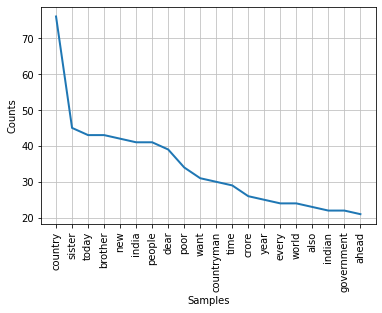

In [21]:
#Frequncy Distribution of cleaned text(after  punctuation & stop word removal,stemming and lemmatization
Freq_dist_nltk=nltk.FreqDist(tokens_5)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:20])
Freq_dist_nltk.plot(20, cumulative=False)

In [22]:
# Form a dataframe with the 20 most commonaly used words
import pandas as pd
freq_word_df = pd.DataFrame(Freq_dist_nltk.most_common(20),columns = ['Words','Freq'])
freq_word_df

,Words,Freq
0,country,76
1,sister,45
2,today,43
3,brother,43
4,new,42
5,india,41
6,people,41
7,dear,39
8,poor,34
9,want,31


## Word Cloud

In [0]:
# Build a wordcloud from the most commonaly used words
from wordcloud import WordCloud, STOPWORDS
word_string = " ".join(freq_word_df.Words)
wordcloud = WordCloud(#stopwords = STOPWORDS, 
    background_color = 'white', max_words = 20).generate(word_string)

<Figure size 720x720 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

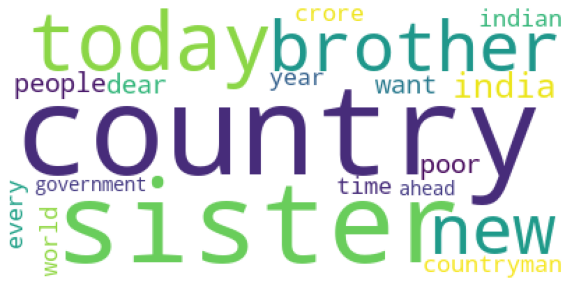

In [24]:
plt.figure(figsize = (10,10))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')

plt.show()

### In this speech president of India has mentioned his country people as brother and sister.He talked about the poor Indian,today government,time and world. 

# Access the  second file for analysis


In [25]:
from google.colab import files
uploaded=files.upload()

Saving mkgandhi.txt to mkgandhi.txt


### My second speech for analysis is MK Gandhi's quit India famous speech.After uploading the file lets read it

In [0]:
with open(os.getcwd()+ "/mkgandhi.txt", encoding='cp1252') as fh: 
    filedata = fh.read()

In [27]:
#Print first 500 characters in the file
print("Data read from file : ", filedata[0:500] )

Data read from file :  The "Quit India" Speeches
(08-08-1942)
{Gandhiji addressed the A.I.C.C. at Bombay on 8-8-42 outlining his plan of action, in Hindustani, as follows;}
Before you discuss the resolution, let me place before you one or two things, I want you to understand two things very clearly and to consider them from the same point of view from which I am placing them before you. I ask you to consider it from my point of view, because if you approve of it, you will be enjoined to carry out all I say. It will be


In [28]:
import nltk
nltk.download('punkt')
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
corpus=PlaintextCorpusReader(os.getcwd(),"mkgandhi.txt",encoding='cp1252')
print(corpus)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<PlaintextCorpusReader in '/content'>


In [29]:
print("Files in this corpus : ", corpus.fileids())

Files in this corpus :  ['mkgandhi.txt']


In [30]:
paragraphs=corpus.paras()
print("\n Total paragraphs in this corpus : ", len(paragraphs))


 Total paragraphs in this corpus :  1


In [31]:
sentences=corpus.sents()
print("\n Total sentences in this corpus : ", len(sentences))


 Total sentences in this corpus :  518


# Tokenization

In [32]:
tokens = nltk.word_tokenize(filedata)
print("Tokens : ",tokens[:20])
print("\n Total Tokens : ",len(tokens))

Tokens :  ['The', '``', 'Quit', 'India', "''", 'Speeches', '(', '08-08-1942', ')', '{', 'Gandhiji', 'addressed', 'the', 'A.I.C.C', '.', 'at', 'Bombay', 'on', '8-8-42', 'outlining']

 Total Tokens :  9853


### Total tokens in this speech is 9853 including punctuation and stop words,let's do some cleaning first and before that check the frequency distribution.

<FreqDist with 1933 samples and 9853 outcomes>
[('the', 501), ('.', 473), ('to', 368), (',', 362), ('I', 273), ('of', 236), ('and', 187), ('in', 143), ('a', 142), ('that', 138), ('is', 126), ('not', 124), ('you', 110), ('have', 107), ('for', 98), ('it', 95), ('will', 94), ('me', 81), ('be', 79), ('my', 75), ('with', 75), ('their', 60), ('as', 52), ('on', 51), ('are', 50)]


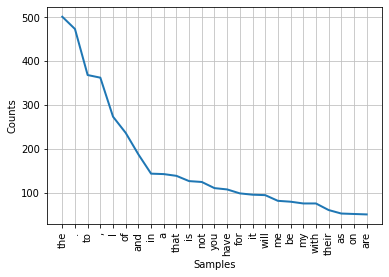

In [33]:
Freq_dist_nltk=nltk.FreqDist(tokens)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

# Cleaning of file


## Remove Punctuation

In [35]:
#Use the Punkt library to extract tokens
tokens_1 = list(filter(lambda token: nltk.tokenize.punkt.PunktToken(token).is_non_punct, tokens))
print("Tokens after removing punctuation : ",tokens_1[:20])
print("\nTotal tokens after removing punctuation : ", len(tokens_1))

Tokens after removing punctuation :  ['The', 'Quit', 'India', 'Speeches', '08-08-1942', 'Gandhiji', 'addressed', 'the', 'A.I.C.C', 'at', 'Bombay', 'on', '8-8-42', 'outlining', 'his', 'plan', 'of', 'action', 'in', 'Hindustani']

Total tokens after removing punctuation :  8844


# Normalization

In [36]:
tokens_2=[word.lower() for word in tokens_1 ]
print("Tokens list after converting to lower case : ", tokens_2[:20])
print("\nTotal tokens after converting to lower case : ", len(tokens_2))


Tokens list after converting to lower case :  ['the', 'quit', 'india', 'speeches', '08-08-1942', 'gandhiji', 'addressed', 'the', 'a.i.c.c', 'at', 'bombay', 'on', '8-8-42', 'outlining', 'his', 'plan', 'of', 'action', 'in', 'hindustani']

Total tokens after converting to lower case :  8844


In [37]:
#Remove stopwords
tokens_3 = list(filter(lambda token: token not in stopwords.words('english'), tokens_2))
print("Tokens list after removing stop words : ", tokens_3[:20])
print("\nTotal tokens after removing stop words : ", len(tokens_3))


Tokens list after removing stop words :  ['quit', 'india', 'speeches', '08-08-1942', 'gandhiji', 'addressed', 'a.i.c.c', 'bombay', '8-8-42', 'outlining', 'plan', 'action', 'hindustani', 'follows', 'discuss', 'resolution', 'let', 'place', 'one', 'two']

Total tokens after removing stop words :  3770


### After removing puctuation and stop words we have 3770 tokens for analysis

# Stemming

In [38]:
#Stem data
tokens_4 = [stemmer.stem(word) for word in tokens_3 ]
print("Token list after stemming : ", tokens_4[:20])
print("\nTotal tokens after Stemming : ", len(tokens_4))

Token list after stemming :  ['quit', 'india', 'speech', '08-08-1942', 'gandhiji', 'address', 'a.i.c.c', 'bombay', '8-8-42', 'outlin', 'plan', 'action', 'hindustani', 'follow', 'discuss', 'resolut', 'let', 'place', 'one', 'two']

Total tokens after Stemming :  3770


# Lemmatization

In [39]:
lemmatizer = WordNetLemmatizer()
tokens_5 = [lemmatizer.lemmatize(word) for word in tokens_4]
print("Tokens list after Lemmatization : ", tokens_5[:20])
print("\nTotal tokens after Lemmatization : ", len(tokens_5))


Tokens list after Lemmatization :  ['quit', 'india', 'speech', '08-08-1942', 'gandhiji', 'address', 'a.i.c.c', 'bombay', '8-8-42', 'outlin', 'plan', 'action', 'hindustani', 'follow', 'discus', 'resolut', 'let', 'place', 'one', 'two']

Total tokens after Lemmatization :  3770


<FreqDist with 1382 samples and 3770 outcomes>
[('india', 46), ('congress', 42), ('say', 41), ('would', 41), ('freedom', 38), ('may', 37), ('mussalman', 34), ('even', 32), ('ask', 29), ('today', 26), ('struggl', 25), ('one', 22), ('peopl', 22), ('free', 22), ('friend', 22), ('world', 21), ('want', 20), ('like', 19), ('time', 18), ('life', 17), ('come', 17), ('hindu', 17), ('take', 17), ('princ', 17), ('know', 16)]


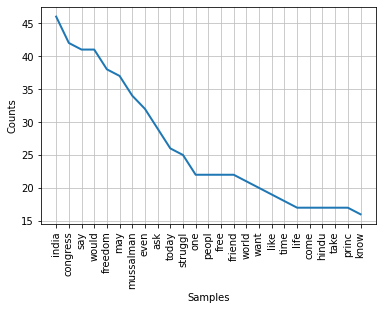

In [40]:
Freq_dist_nltk=nltk.FreqDist(tokens_5)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

In [41]:
# Form a dataframe with the 20 most commonaly used words
import pandas as pd
freq_word_df = pd.DataFrame(Freq_dist_nltk.most_common(20),columns = ['Words','Freq'])
freq_word_df

,Words,Freq
0,india,46
1,congress,42
2,say,41
3,would,41
4,freedom,38
5,may,37
6,mussalman,34
7,even,32
8,ask,29
9,today,26


In [0]:
# Build a wordcloud from the most commonaly used words
from wordcloud import WordCloud, STOPWORDS
word_string = " ".join(freq_word_df.Words)
wordcloud = WordCloud(#stopwords = STOPWORDS, 
    background_color = 'white', max_words = 20).generate(word_string)

<Figure size 720x720 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

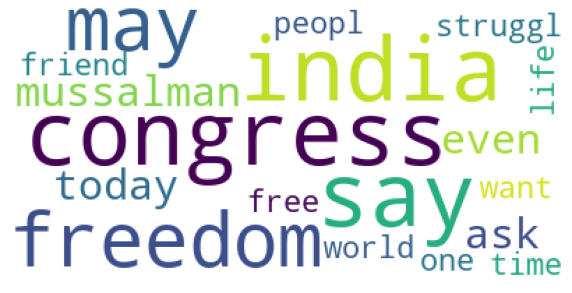

In [43]:
plt.figure(figsize = (10,10))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')

plt.show()

### In this speech Gandhi ji was talking about  congress,India's freedom.He was mentioning all about the struggle by people including mussalman friend.He had also mentioned about world,life and time.